In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [182]:
#subway entrance each 15 minutes for station during 2014
#data is almost 1Gb
url = 'https://recursos-data.buenosaires.gob.ar/ckan2/subte-molinetes/molinetes_2014.csv'
filePath = '/home/pipe/Descargas/molinetes_2014.csv'
rawData = pd.read_csv(#url,
                      filePath,
                      sep = ';',
                      usecols = [0,1,3,5,9],
                      parse_dates = [0],
                      #nrows = 100000
                     )
rawData.columns = ['date','time','line','station','trips']
rawData.head()

,date,time,line,station,trips
0,2014-04-09,09:15,B,Florida,7
1,2014-04-09,09:15,B,Florida,9
2,2014-04-09,09:15,B,Florida,16
3,2014-04-09,09:15,B,Florida,18
4,2014-04-09,09:15,B,Florida,12


In [183]:
#change wrong labels in stations
rawData.station.replace(to_replace='Saenz Peña', value='Saenz Pena', inplace=True)
rawData.station.replace(to_replace='Independencia.', value='Independencia', inplace=True)

In [184]:
#get days and remove sunday and saturday
#Monday=0, Sunday=6
rawData['day'] = rawData.date.map(lambda x: x.weekday())
print rawData.day.value_counts()

rawData.query('day < 5', inplace=True)
print rawData.day.value_counts()

rawData.drop('day', inplace = True, axis = 1)



1    1713975
2    1697818
4    1681579
0    1664672
3    1649456
5    1385764
6    1063980
Name: day, dtype: int64
1    1713975
2    1697818
4    1681579
0    1664672
3    1649456
Name: day, dtype: int64


In [185]:
#group by time - roush hour general
gTime = rawData.groupby(['time']).trips.mean()


{}

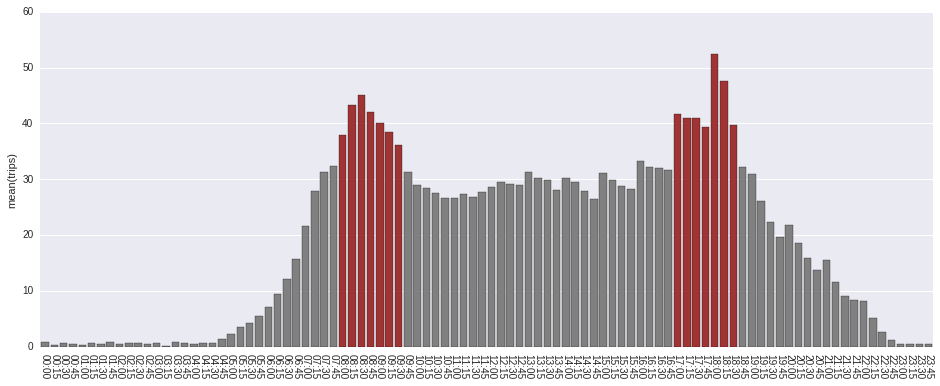

In [186]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)

rushValue = gTime.sort_values(ascending=False)[13]
#rush hour 8 to 9:30 and 17 to 18:30
#change color
colors =['grey' if (x < rushValue) else 'firebrick' for x in gTime ]

ax = sns.barplot(range(len(gTime)),gTime, palette = colors)
ax.set_xticks(range(len(gTime)))
ax.set_xticklabels(list(gTime.index), rotation = 270)
{}


In [187]:
lines = rawData.line.unique()

#group by time and line - roush hour por linea
gTimeLine = rawData.groupby(['line','time']).mean()


In [188]:
lineColors = {'A':'dodgerblue','B':'red','C':'mediumblue','D':'forestgreen','E':'purple','H':'yellow','P':'coral'}


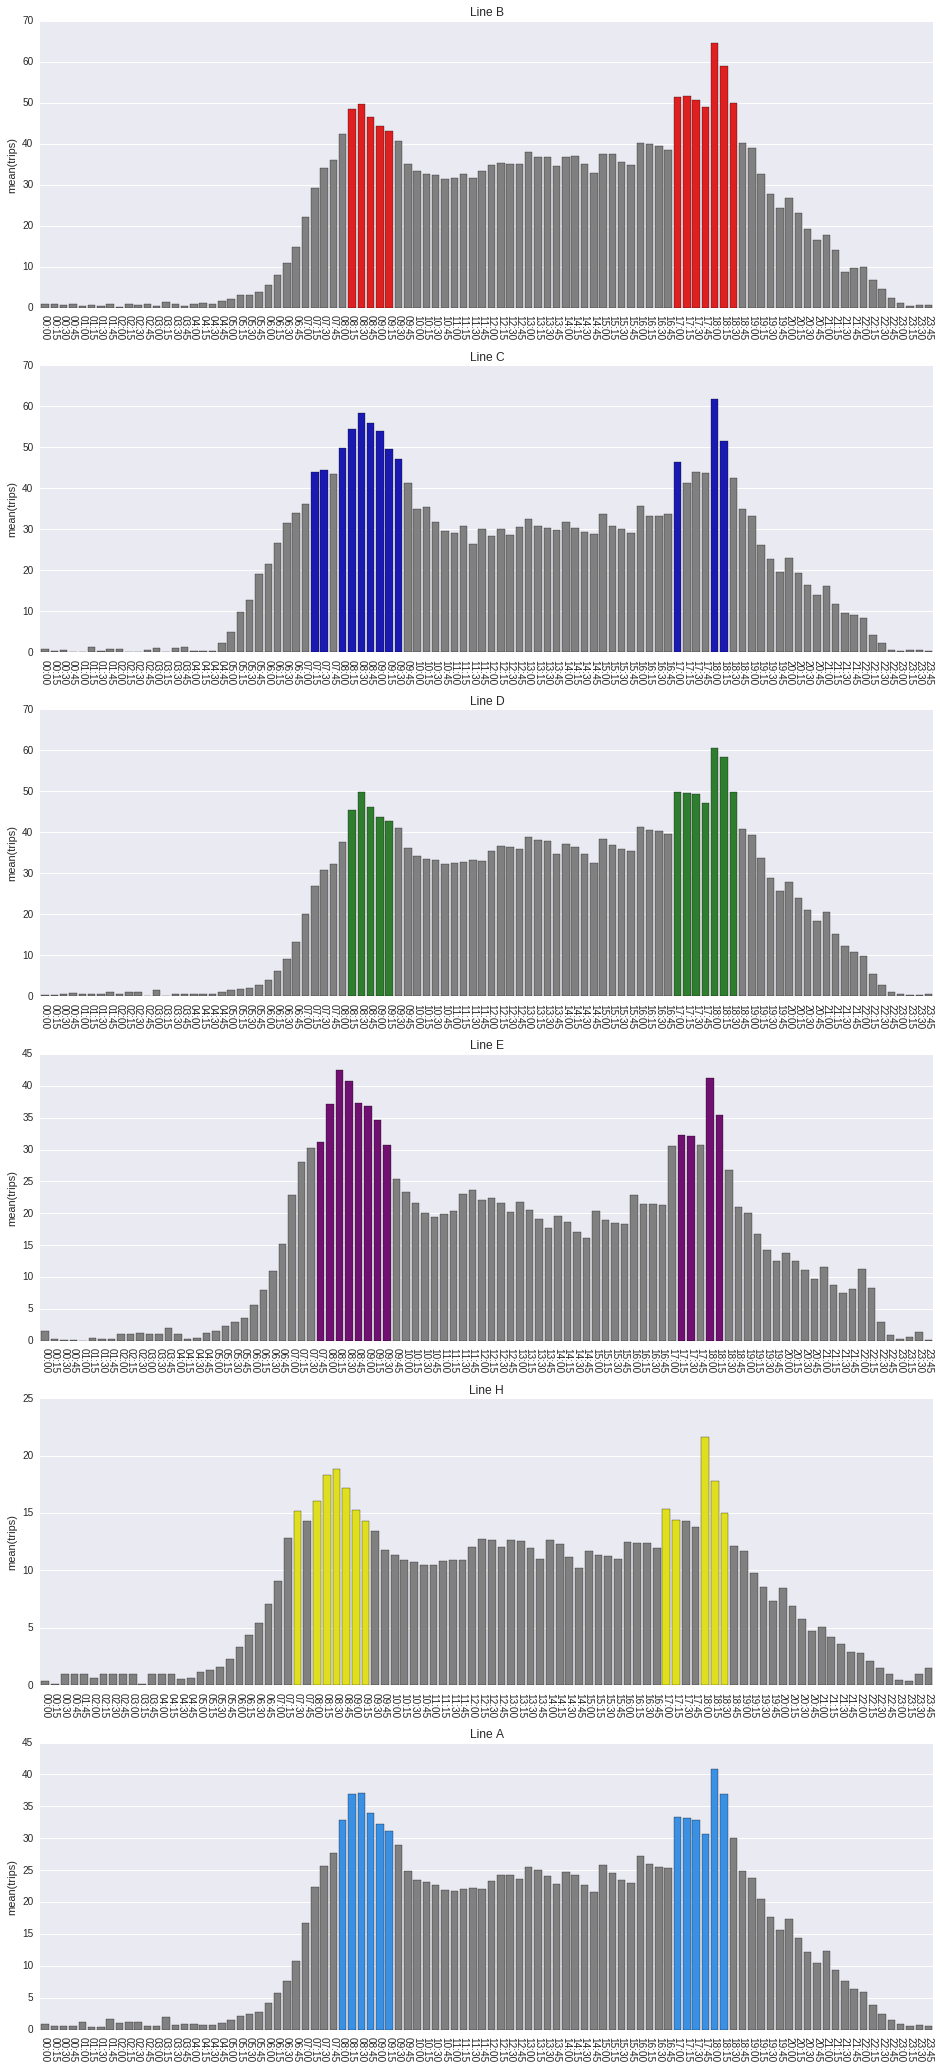

In [189]:
fig = plt.figure(figsize=(16,36))
#rush hour 8 to 9:30 and 17 to 18:30 seems to fit to every line


for idLine in range(len(lines)):
    tripTimes = gTimeLine.loc[lines[idLine]].trips
    rushValueLine = tripTimes.sort_values(ascending=False)[11]
    colors =['grey' if (x < rushValueLine) else lineColors[lines[idLine]] for x in tripTimes ]
    ax = fig.add_subplot(6,1,idLine + 1)    
    ax = sns.barplot(range(len(tripTimes)),tripTimes, palette = colors)
    ax.set_title('Line '+ lines[idLine])
    ax.set_xticks(range(len(tripTimes)))
    ax.set_xticklabels(list(tripTimes.index), rotation = 270)


In [190]:
morningRush = ['08:00','08:15','08:30','08:45','09:00','09:15','09:30']
eveningRush = ['17:00','17:15','17:30','17:45','18:00','18:15','18:30']

morningRushData = rawData.copy()[rawData.time.isin(morningRush)]
eveningRushData = rawData.copy()[rawData.time.isin(eveningRush)]

In [191]:
morningRushStations = morningRushData.groupby(['line','station']).mean()
eveningRushStations = eveningRushData.groupby(['line','station']).mean()

In [198]:
list(morningRushStations.loc['H'].index)

['Caseros',
 'Corrientes',
 'Hospitales',
 'Humberto I',
 'Inclan',
 'Once',
 'Patricios',
 'Venezuela']

In [199]:
#subway station order
stationOrder ={'A':
               ['San Pedrito','Flores', 'Carabobo',  'Puan','Primera Junta', 'Acoyte','Rio de Janeiro', 
                'Castro Barros','Loria',  'Plaza Miserere', 'Alberti','Pasco','Congreso', 'Saenz Pena',
                'Lima', 'Piedras', 'Peru','Plaza de Mayo'],
               'B':[ 'Rosas', 'Echeverria', 'Los Incas', 'Tronador','Federico Lacroze', 'Dorrego', 'Malabia',
                    'Angel Gallardo','Medrano', 'Carlos Gardel', 'Pueyrredon', 'Pasteur','Callao','Uruguay',
                    'Carlos Pellegrini', 'Florida','Leandro N. Alem'],
               'C': [ 'Retiro','General San Martin','Lavalle','Diagonal Norte','Avenida de Mayo',
                     'Mariano Moreno','Independencia','San Juan','Constitucion'],
               'D':['Congreso de Tucuman','Juramento','Jose Hernandez','Olleros','Ministro Carranza',
                    'Palermo','Plaza Italia','Scalabrini Ortiz','Bulnes','Aguero','Pueyrredon.',
                    'Facultad de Medicina','Callao.','Tribunales','9 de julio','Catedral'],
               'E':['Pza. de los Virreyes','Varela', 'Medalla Milagrosa','Emilio Mitre', 'Jose Maria Moreno',
                    'Avenida La Plata','Boedo','Urquiza','Jujuy','Pichincha','Entre Rios','San Jose',
                    'Independencia','General Belgrano','Bolivar'],
               'H':['Corrientes','Once', 'Venezuela','Humberto I','Inclan','Caseros','Patricios','Hospitales']
              }

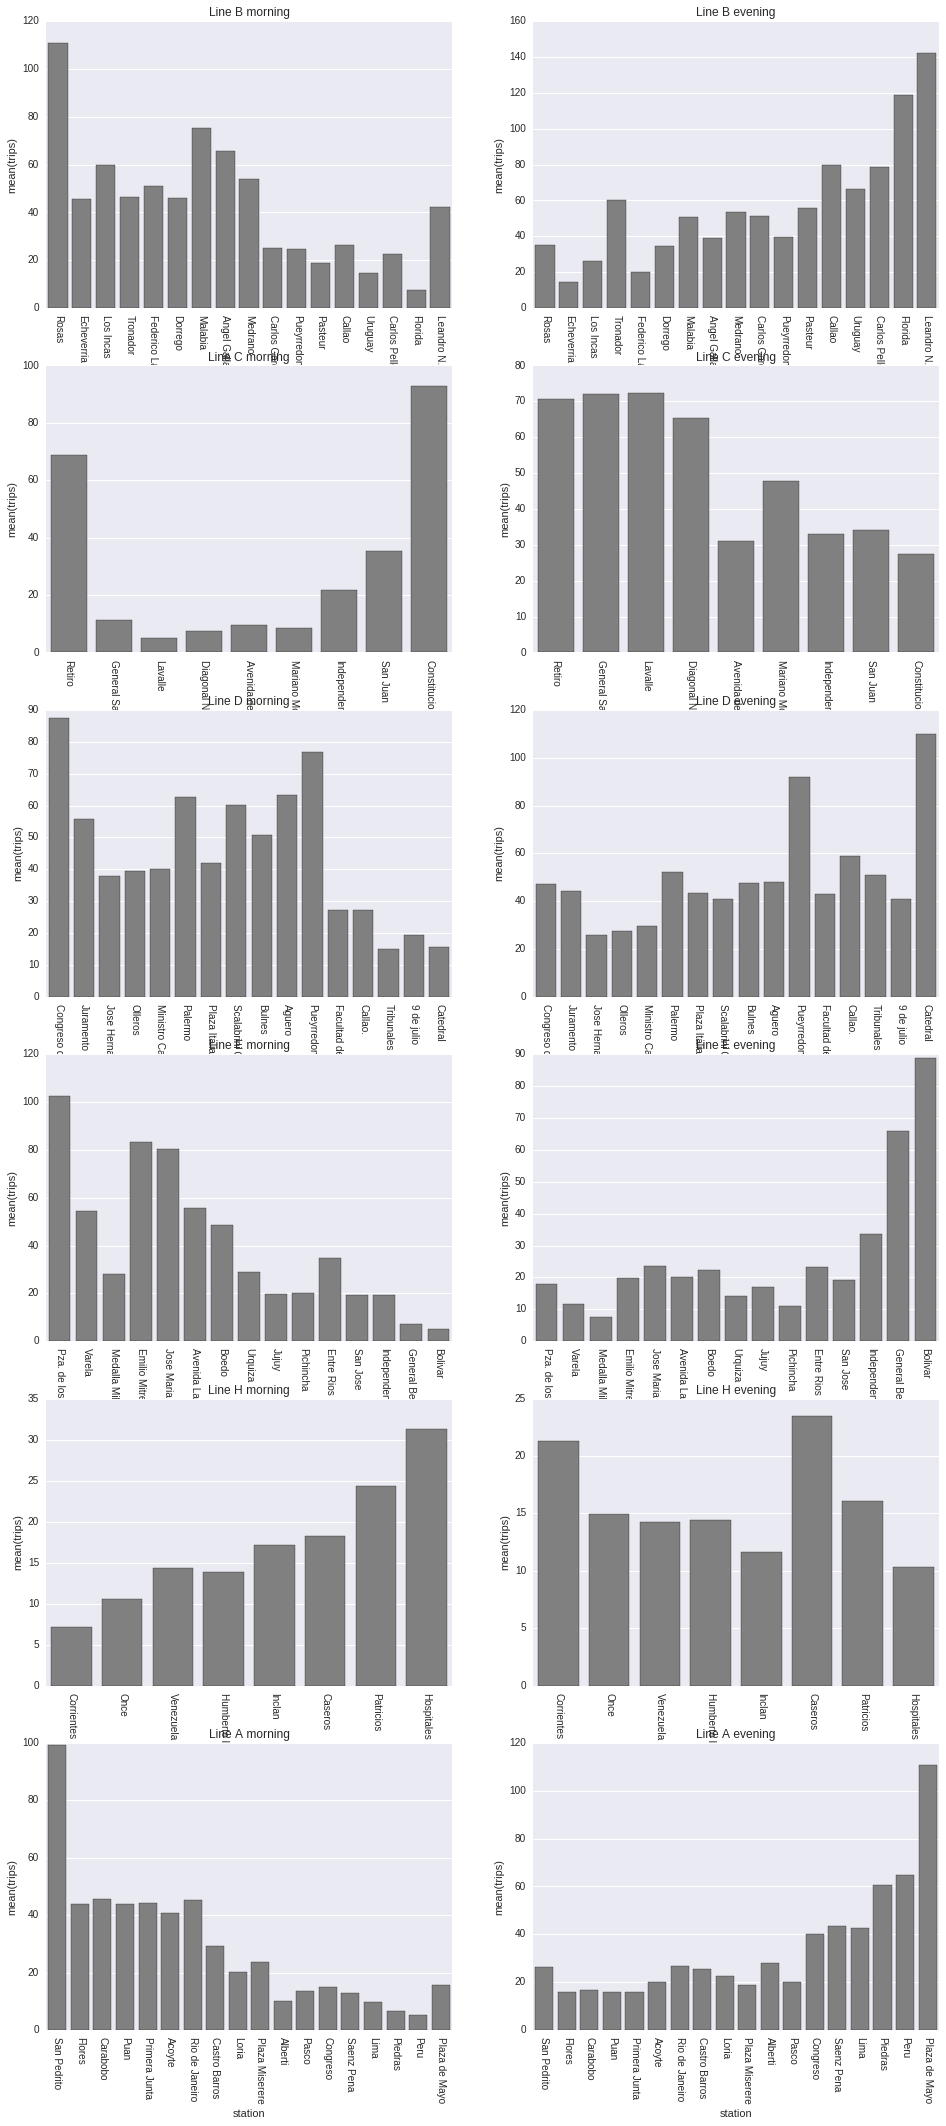

In [201]:
fig = plt.figure(figsize=(16,36))
plotID = 1
for idLine in range(len(lines)):
    for daytime in ['morning','evening']:
        if daytime == 'morning':
            dataset = morningRushStations
        else:
            dataset = eveningRushStations
        
        tripsByStation = dataset.loc[lines[idLine]]
        tripsByStation['station'] = tripsByStation.index
        tripsByStation['station'] = tripsByStation.station.astype('category')
        ax = fig.add_subplot(6,2,plotID)    
        ax = sns.barplot(tripsByStation.station,tripsByStation.trips, palette = colors,order=stationOrder[lines[idLine]])
        ax.set_title('Line '+ lines[idLine] + ' ' + daytime)
        ax.set_xticks(range(len(stationOrder[lines[idLine]])))
        ax.set_xticklabels(stationOrder[lines[idLine]], rotation = 270)
        plotID += 1



[]

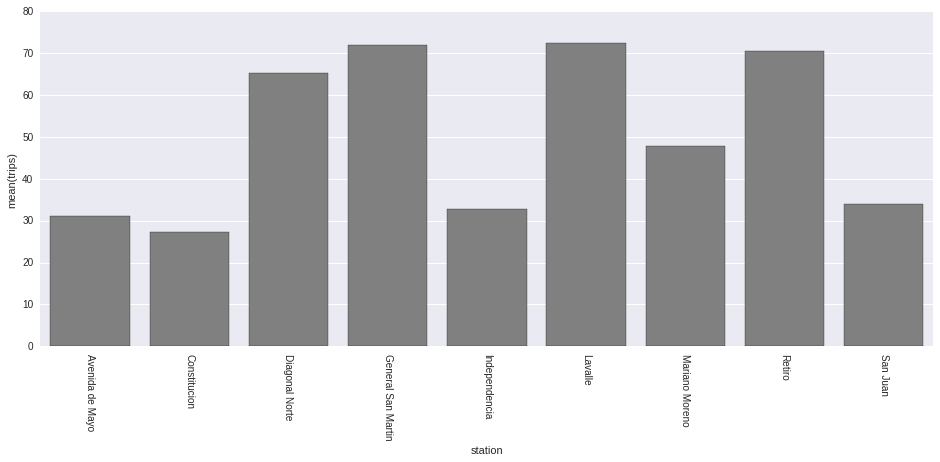

In [204]:

#dataset = morningRushStations

dataset = eveningRushStations

tripsByStation = dataset.loc['C']
tripsByStation['station'] = tripsByStation.index
tripsByStation['station'] = tripsByStation.station.astype('category')

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,1,1)
#.astype('category')
ax = sns.barplot(tripsByStation.station,tripsByStation.trips, palette = colors)
ax.set_xticks(range(len(tripsByStation.station)))
ax.set_xticklabels(tripsByStation.station, rotation = 270)
[]

In [203]:
#definir orden de estaciones para todos
#para cada estacion, para cada hora, MEAN de viajes